In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
df=pd.read_csv('T20_1.csv')
df.tail(5)

,분기,가입자 일련번호,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
11638786,4,882752,2,16,46,5,M54,M17,1,1.0,19580.0,1900.0,17680.0,0.0
11638787,3,882752,2,16,46,1,I10,M96,1,1.0,20540.0,4100.0,16440.0,60.0
11638788,1,882752,2,16,46,1,K21,K29,1,1.0,7820.0,2700.0,5120.0,10.0
11638789,1,882752,2,16,46,1,I10,M96,1,1.0,13230.0,1500.0,11730.0,60.0
11638790,2,882752,2,16,46,1,I10,M96,1,NaN,NaN,NaN,NaN,NaN


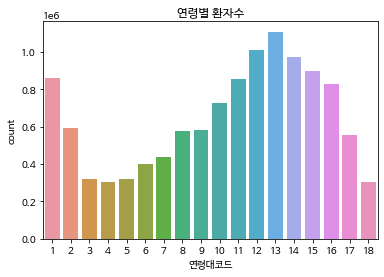

In [ ]:
sns.countplot(x='연령대코드',data=df)
plt.title('연령별 환자수')
plt.show()

In [ ]:
filename='T20_1.csv'
haspital=pd.read_csv(filename,encoding='utf-8')

In [ ]:
haspital

,분기,가입자 일련번호,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,4,1,2,12,46,5,M75,M75,1,1,19240.0,9600.0,9640.0,0
1,3,1,2,12,46,1,E11,N30,1,1,145680.0,72800.0,72880.0,0
2,3,1,2,12,46,1,N30,E11,1,1,13240.0,6600.0,6640.0,3
3,3,1,2,12,46,1,E11,N30,7,21,861590.0,205810.0,655780.0,0
4,1,1,2,12,46,13,H65,J30,1,1,48440.0,14500.0,33940.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178340,4,1000000,2,1,47,21,P22,P07,1,1,71000.0,7100.0,63900.0,0
13178341,4,1000000,2,1,47,11,J20,J00,1,1,17620.0,1700.0,15920.0,3
13178342,2,1000000,2,1,47,12,H35,P22,1,1,31890.0,3100.0,28790.0,0
13178343,2,1000000,2,1,47,11,P22,P07,11,12,1757040.0,27670.0,1729370.0,0


In [ ]:
dlist = ['A16', 'B59', 'C34', 'C37', 'C38', 'C39', 'C45', 'C78', 'D15', 'I27', 'J09', 'J10',
'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'J20', 'J21', 'J22', 'J40',
'J41', 'J42', 'J43', 'J44', 'J45', 'J46', 'J47', 'J60', 'J61', 'J62', 'J63', 'J64',
'J65', 'J66', 'J67', 'J68', 'J69', 'J70', 'J80', 'J81', 'J82', 'J84', 'J85', 'J86',
'J90', 'J91', 'J92', 'J93', 'J94', 'J95', 'J96', 'J98', 'J99', 'O88', 'P23', 'P24',
'P25', 'P26', 'P27', 'P28', 'Q32', 'Q33', 'Q34', 'R04', 'R05', 'R06', 'R07', 'R09',
'R52', 'R84', 'R91', 'S22', 'S23', 'S24', 'S25', 'S27', 'S28', 'S29', 'T21', 'T27',
'U04', 'U69', 'U70', 'W78', 'W80', 'W83', 'W84']
respiratory = df[df['주상병코드'].isin(dlist)]
respiratory

,분기,가입자 일련번호,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
60,1,5,2,7,11,1,J20,J02,1,1.0,15690.0,4700.0,10990.0,3.0
64,4,5,2,7,11,1,J20,J01,1,1.0,17650.0,5200.0,12450.0,3.0
71,3,5,2,7,11,1,J20,J02,1,1.0,15700.0,4700.0,11000.0,5.0
73,1,6,1,13,26,1,J40,J30,1,1.0,13730.0,5400.0,8330.0,3.0
76,1,6,1,13,26,1,J40,J30,1,1.0,22760.0,9100.0,13660.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638706,4,882749,1,2,41,11,J18,J20,1,1.0,18160.0,7200.0,10960.0,5.0
11638707,3,882749,1,2,41,11,J20,J06,1,1.0,15690.0,4700.0,10990.0,3.0
11638709,4,882749,1,2,41,1,J20,J01,1,1.0,23710.0,7100.0,16610.0,3.0
11638710,2,882749,1,2,41,13,J20,J30,1,1.0,13660.0,4000.0,9660.0,3.0


In [ ]:
ex5 = respiratory[respiratory['주상병코드'].str.contains('J')]

In [ ]:
ex5['주상병코드'] = ex5.주상병코드.str.replace(r'(^.*J.*$)', 'J')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1]:
sns.countplot(x='연령대코드',data=ex5)
plt.title('나이대별 남자 호흡기질환 환자수')
plt.show()

NameError: ignored

In [ ]:
sns.countplot(x='성별코드',data=ex5)
plt.title('남여환자수')
plt.show()

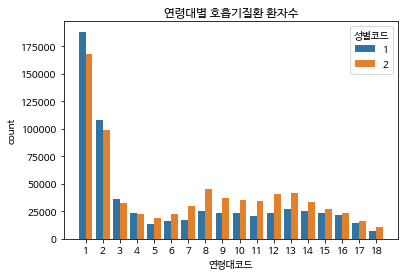

In [ ]:
sns.countplot(x='연령대코드',hue='성별코드' ,data=ex5)
plt.plot()
plt.title('연령대별 호흡기질환 환자수')
plt.show()

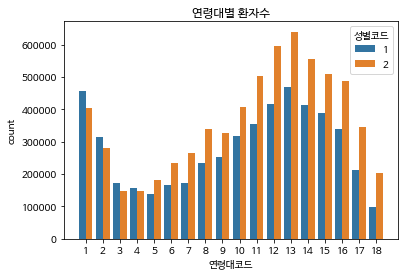

In [ ]:
sns.countplot(x='연령대코드',hue='성별코드' ,data=df)
plt.plot()
plt.title('연령대별 환자수')
plt.show()

In [ ]:
ex5.index=ex5.index.astype(str).str.replace('.0','')

In [ ]:
ex5

,분기,가입자 일련번호,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
60,1,5,2,7,11,1,J,J02,1,1.0,15690.0,4700.0,10990.0,3.0
64,4,5,2,7,11,1,J,J01,1,1.0,17650.0,5200.0,12450.0,3.0
71,3,5,2,7,11,1,J,J02,1,1.0,15700.0,4700.0,11000.0,5.0
73,1,6,1,13,26,1,J,J30,1,1.0,13730.0,5400.0,8330.0,3.0
76,1,6,1,13,26,1,J,J30,1,1.0,22760.0,9100.0,13660.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11638706,4,882749,1,2,41,11,J,J20,1,1.0,18160.0,7200.0,10960.0,5.0
11638707,3,882749,1,2,41,11,J,J06,1,1.0,15690.0,4700.0,10990.0,3.0
11638709,4,882749,1,2,41,1,J,J01,1,1.0,23710.0,7100.0,16610.0,3.0
11638710,2,882749,1,2,41,13,J,J30,1,1.0,13660.0,4000.0,9660.0,3.0
